In [ ]:
#!pip install wordcloud

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score



In [2]:
df=pd.read_csv(r'/content/linkedin_data 2023-03-31_final (1).csv')
df

,Date,Job_Name,Company,Loaction,Job_type,Employees,Followers,Applicant,Industry,Invovlement
0,3/31/2023,"Client Technology: Platform Engineering, Senio...",EY,"Trivandrum, Kerala, India",On-site,"10,001+ employees","7,366,377 followers",9 applicants,Information Technology & Services,Full-time · Mid-Senior level
1,3/31/2023,Associate - Global Intelligence (Open Source C...,JPMorgan Chase & Co.,"Mumbai, Maharashtra, India",On-site,"10,001+ employees","3,791,093 followers",10 applicants,Financial Services,Full-time
2,3/31/2023,MTS Software Development Eng.,AMD,"Bengaluru, Karnataka, India",On-site,"10,001+ employees","1,068,681 followers",41 applicants,Semiconductors,Full-time · Mid-Senior level
3,3/31/2023,Tech Lead - Wifi Development,VVDN Technologies,"Chennai, Tamil Nadu, India",On-site,"10,001+ employees","62,010 followers",13 applicants,Information Technology & Services,Full-time · Mid-Senior level
4,3/31/2023,Senior Application Specialist,Leica Biosystems,"Mumbai, Maharashtra, India",On-site,"1,001-5,000 employees","86,924 followers",78 applicants,Medical Device,Full-time
...,...,...,...,...,...,...,...,...,...,...
1122,3/31/2023,AM- Analytics-ANA007048,Genpact,"Bengaluru, Karnataka, India",On-site,"10,001+ employees","2,639,117 followers",58 applicants,Information Technology & Services,Full-time · Associate
1123,3/31/2023,Senior Data & API Consultant,Pluralsight,"Bengaluru, Karnataka, India",Hybrid,"1,001-5,000 employees","175,876 followers",3 applicants,Computer Software,Full-time · Mid-Senior level
1124,3/31/2023,Staff,Bunge,"Andhra Pradesh, India",On-site,"10,001+ employees","1,213,984 followers",66 applicants,Food Production,Full-time · Associate
1125,3/31/2023,Software Performance Analyst (Cyber Security),BlackBerry,"Uttar Pradesh, India",On-site,"5,001-10,000 employees","306,410 followers",65 applicants,Computer Software,Full-time


### EDA

In [3]:
df.shape

(1127, 10)

In [4]:
df.info

<bound method DataFrame.info of            Date                                           Job_Name  \
0     3/31/2023  Client Technology: Platform Engineering, Senio...   
1     3/31/2023  Associate - Global Intelligence (Open Source C...   
2     3/31/2023                      MTS Software Development Eng.   
3     3/31/2023                       Tech Lead - Wifi Development   
4     3/31/2023                      Senior Application Specialist   
...         ...                                                ...   
1122  3/31/2023                            AM- Analytics-ANA007048   
1123  3/31/2023                       Senior Data & API Consultant   
1124  3/31/2023                                              Staff   
1125  3/31/2023      Software Performance Analyst (Cyber Security)   
1126  3/31/2023                                 Team Lead-Big Data   

                   Company                     Loaction Job_type  \
0                       EY    Trivandrum, Kerala, India  On

### EDA- Extraction and Trsnform

In [5]:
## Finding missing value
df.isna().sum()

Date           0
Job_Name       0
Company        0
Loaction       0
Job_type       0
Employees      0
Followers      0
Applicant      1
Industry       1
Invovlement    0
dtype: int64

In [6]:
df.isna()

,Date,Job_Name,Company,Loaction,Job_type,Employees,Followers,Applicant,Industry,Invovlement
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1122,False,False,False,False,False,False,False,False,False,False
1123,False,False,False,False,False,False,False,False,False,False
1124,False,False,False,False,False,False,False,False,False,False
1125,False,False,False,False,False,False,False,False,False,False


In [7]:
df.fillna(0) ### Filling missing values by 0

,Date,Job_Name,Company,Loaction,Job_type,Employees,Followers,Applicant,Industry,Invovlement
0,3/31/2023,"Client Technology: Platform Engineering, Senio...",EY,"Trivandrum, Kerala, India",On-site,"10,001+ employees","7,366,377 followers",9 applicants,Information Technology & Services,Full-time · Mid-Senior level
1,3/31/2023,Associate - Global Intelligence (Open Source C...,JPMorgan Chase & Co.,"Mumbai, Maharashtra, India",On-site,"10,001+ employees","3,791,093 followers",10 applicants,Financial Services,Full-time
2,3/31/2023,MTS Software Development Eng.,AMD,"Bengaluru, Karnataka, India",On-site,"10,001+ employees","1,068,681 followers",41 applicants,Semiconductors,Full-time · Mid-Senior level
3,3/31/2023,Tech Lead - Wifi Development,VVDN Technologies,"Chennai, Tamil Nadu, India",On-site,"10,001+ employees","62,010 followers",13 applicants,Information Technology & Services,Full-time · Mid-Senior level
4,3/31/2023,Senior Application Specialist,Leica Biosystems,"Mumbai, Maharashtra, India",On-site,"1,001-5,000 employees","86,924 followers",78 applicants,Medical Device,Full-time
...,...,...,...,...,...,...,...,...,...,...
1122,3/31/2023,AM- Analytics-ANA007048,Genpact,"Bengaluru, Karnataka, India",On-site,"10,001+ employees","2,639,117 followers",58 applicants,Information Technology & Services,Full-time · Associate
1123,3/31/2023,Senior Data & API Consultant,Pluralsight,"Bengaluru, Karnataka, India",Hybrid,"1,001-5,000 employees","175,876 followers",3 applicants,Computer Software,Full-time · Mid-Senior level
1124,3/31/2023,Staff,Bunge,"Andhra Pradesh, India",On-site,"10,001+ employees","1,213,984 followers",66 applicants,Food Production,Full-time · Associate
1125,3/31/2023,Software Performance Analyst (Cyber Security),BlackBerry,"Uttar Pradesh, India",On-site,"5,001-10,000 employees","306,410 followers",65 applicants,Computer Software,Full-time


In [8]:
df[df.duplicated()].shape

(79, 10)

In [9]:
df[df.duplicated()]

,Date,Job_Name,Company,Loaction,Job_type,Employees,Followers,Applicant,Industry,Invovlement
40,3/31/2023,Data Controller,ENP Technologies,"Maharashtra, India",Hybrid,2-10 employees,"1,000 followers",108 applicants,Information Technology & Services,Full-time
56,3/31/2023,Field Service Technician,Evoqua Water Technologies,"Lephripada, Odisha, India",On-site,"1,001-5,000 employees","84,683 followers",26 applicants,Environmental Services,Full-time
76,3/31/2023,Service Technician,Leslie's,"Salem, Tamil Nadu, India",On-site,"1,001-5,000 employees","15,251 followers",16 applicants,Retail,Full-time · Executive
84,3/31/2023,SEO Analyst,LIFE AT WOODS,"Hyderabad, Telangana, India",On-site,51-200 employees,791 followers,76 applicants,Government Administration,Full-time
100,3/31/2023,Technical Lead,MiQ,"Bangalore Urban, Karnataka, India",Hybrid,"501-1,000 employees","48,092 followers",31 applicants,Marketing & Advertising,Full-time · Mid-Senior level
...,...,...,...,...,...,...,...,...,...,...
1093,3/31/2023,Implementation Lead,Vihara Innovation Network,"Shillong, Meghalaya, India",Hybrid,11-50 employees,"11,667 followers",95 applicants,Government Administration,Contract
1094,3/31/2023,Risk-BENGALURU-Analyst-Liquidity Risk,Goldman Sachs,"Bengaluru, Karnataka, India",On-site,"10,001+ employees","3,718,148 followers",13 applicants,Financial Services,Full-time · Entry level
1099,3/31/2023,SFCC UI Developer,SwiftWIN | A Concord Company,"Maharashtra, India",Hybrid,201-500 employees,"10,239 followers",67 applicants,Information Technology & Services,Full-time · Mid-Senior level
1113,3/31/2023,"Assistant Team Leader - New Delhi, India",Blue Umbrella Limited,"New Delhi, Delhi, India",On-site,201-500 employees,"12,123 followers",166 applicants,Research,Full-time · Entry level


In [10]:
df1=df.drop_duplicates()
df1

,Date,Job_Name,Company,Loaction,Job_type,Employees,Followers,Applicant,Industry,Invovlement
0,3/31/2023,"Client Technology: Platform Engineering, Senio...",EY,"Trivandrum, Kerala, India",On-site,"10,001+ employees","7,366,377 followers",9 applicants,Information Technology & Services,Full-time · Mid-Senior level
1,3/31/2023,Associate - Global Intelligence (Open Source C...,JPMorgan Chase & Co.,"Mumbai, Maharashtra, India",On-site,"10,001+ employees","3,791,093 followers",10 applicants,Financial Services,Full-time
2,3/31/2023,MTS Software Development Eng.,AMD,"Bengaluru, Karnataka, India",On-site,"10,001+ employees","1,068,681 followers",41 applicants,Semiconductors,Full-time · Mid-Senior level
3,3/31/2023,Tech Lead - Wifi Development,VVDN Technologies,"Chennai, Tamil Nadu, India",On-site,"10,001+ employees","62,010 followers",13 applicants,Information Technology & Services,Full-time · Mid-Senior level
4,3/31/2023,Senior Application Specialist,Leica Biosystems,"Mumbai, Maharashtra, India",On-site,"1,001-5,000 employees","86,924 followers",78 applicants,Medical Device,Full-time
...,...,...,...,...,...,...,...,...,...,...
1121,3/31/2023,Senior Tableau Developer,Valiantys - Atlassian Platinum Solution Partner,"Delhi, Delhi, India",Remote,"501-1,000 employees","8,449 followers",72 applicants,Information Technology & Services,Full-time
1122,3/31/2023,AM- Analytics-ANA007048,Genpact,"Bengaluru, Karnataka, India",On-site,"10,001+ employees","2,639,117 followers",58 applicants,Information Technology & Services,Full-time · Associate
1123,3/31/2023,Senior Data & API Consultant,Pluralsight,"Bengaluru, Karnataka, India",Hybrid,"1,001-5,000 employees","175,876 followers",3 applicants,Computer Software,Full-time · Mid-Senior level
1124,3/31/2023,Staff,Bunge,"Andhra Pradesh, India",On-site,"10,001+ employees","1,213,984 followers",66 applicants,Food Production,Full-time · Associate


In [11]:
df1.isna().sum()

Date           0
Job_Name       0
Company        0
Loaction       0
Job_type       0
Employees      0
Followers      0
Applicant      1
Industry       1
Invovlement    0
dtype: int64

In [12]:
df1.isnull().values.any()

True

In [13]:
df2=df1.fillna(0)


In [14]:
df2.isna().sum()

Date           0
Job_Name       0
Company        0
Loaction       0
Job_type       0
Employees      0
Followers      0
Applicant      0
Industry       0
Invovlement    0
dtype: int64

In [15]:
df2.rename(columns = {'Loaction':'Location'}, inplace = True)
df2

,Date,Job_Name,Company,Location,Job_type,Employees,Followers,Applicant,Industry,Invovlement
0,3/31/2023,"Client Technology: Platform Engineering, Senio...",EY,"Trivandrum, Kerala, India",On-site,"10,001+ employees","7,366,377 followers",9 applicants,Information Technology & Services,Full-time · Mid-Senior level
1,3/31/2023,Associate - Global Intelligence (Open Source C...,JPMorgan Chase & Co.,"Mumbai, Maharashtra, India",On-site,"10,001+ employees","3,791,093 followers",10 applicants,Financial Services,Full-time
2,3/31/2023,MTS Software Development Eng.,AMD,"Bengaluru, Karnataka, India",On-site,"10,001+ employees","1,068,681 followers",41 applicants,Semiconductors,Full-time · Mid-Senior level
3,3/31/2023,Tech Lead - Wifi Development,VVDN Technologies,"Chennai, Tamil Nadu, India",On-site,"10,001+ employees","62,010 followers",13 applicants,Information Technology & Services,Full-time · Mid-Senior level
4,3/31/2023,Senior Application Specialist,Leica Biosystems,"Mumbai, Maharashtra, India",On-site,"1,001-5,000 employees","86,924 followers",78 applicants,Medical Device,Full-time
...,...,...,...,...,...,...,...,...,...,...
1121,3/31/2023,Senior Tableau Developer,Valiantys - Atlassian Platinum Solution Partner,"Delhi, Delhi, India",Remote,"501-1,000 employees","8,449 followers",72 applicants,Information Technology & Services,Full-time
1122,3/31/2023,AM- Analytics-ANA007048,Genpact,"Bengaluru, Karnataka, India",On-site,"10,001+ employees","2,639,117 followers",58 applicants,Information Technology & Services,Full-time · Associate
1123,3/31/2023,Senior Data & API Consultant,Pluralsight,"Bengaluru, Karnataka, India",Hybrid,"1,001-5,000 employees","175,876 followers",3 applicants,Computer Software,Full-time · Mid-Senior level
1124,3/31/2023,Staff,Bunge,"Andhra Pradesh, India",On-site,"10,001+ employees","1,213,984 followers",66 applicants,Food Production,Full-time · Associate


In [16]:
df2.dtypes

Date           object
Job_Name       object
Company        object
Location       object
Job_type       object
Employees      object
Followers      object
Applicant      object
Industry       object
Invovlement    object
dtype: object

In [17]:
import re
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    #text = text.lower()
    text = re.sub('\[.*?\]', '', text)
   # text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    #text = re.sub('\w*\d\w*', '', text)  ### Removing alpha numeric characters
    return text

In [18]:
df3=df2.copy()
df3['Job_Name'] = df3['Job_Name'].apply(lambda x: clean_text(x))
df3['Company'] = df3['Company'].apply(lambda x: clean_text(x))
df3['Company'] = df3['Company'].apply(lambda x: clean_text(x))
df3['Location'] = df3['Location'].apply(lambda x: clean_text(x))
df3['Job_type'] = df3['Job_type'].apply(lambda x: clean_text(x))
df3['Employees'] = df3['Employees'].apply(lambda x: clean_text(x))
df3['Followers'] = df3['Followers'].apply(lambda x: clean_text(x))
#df3['Industry'] = df3['Industry'].apply(lambda x: clean_text(x))
df3['Invovlement'] = df3['Invovlement'].apply(lambda x: clean_text(x))
### Let's replace some repetitive strings
df3['Employees'] = df3['Employees'].str.replace('employees', '')
df3["Employees"]=df3["Employees"].str.split("+").str[0]
df3["Employees"]=df3["Employees"].str.split("-").str[0].str.replace(',', '')
df3["Employees"] = df3["Employees"].str.replace(' on LinkedIn',' ')
df3['Followers'] = df3['Followers'].str.replace('followers', '').str.replace(',', '')
df3['Applicant'] = df3['Applicant'].str.replace('applicants', '')
df3['Applicant']=df3['Applicant'].str.split(" ").str[0]
df3

,Date,Job_Name,Company,Location,Job_type,Employees,Followers,Applicant,Industry,Invovlement
0,3/31/2023,Client Technology Platform Engineering Senior ...,EY,Trivandrum Kerala India,Onsite,10001,7366377,9,Information Technology & Services,Fulltime · MidSenior level
1,3/31/2023,Associate Global Intelligence Open Source Col...,JPMorgan Chase Co,Mumbai Maharashtra India,Onsite,10001,3791093,10,Financial Services,Fulltime
2,3/31/2023,MTS Software Development Eng,AMD,Bengaluru Karnataka India,Onsite,10001,1068681,41,Semiconductors,Fulltime · MidSenior level
3,3/31/2023,Tech Lead Wifi Development,VVDN Technologies,Chennai Tamil Nadu India,Onsite,10001,62010,13,Information Technology & Services,Fulltime · MidSenior level
4,3/31/2023,Senior Application Specialist,Leica Biosystems,Mumbai Maharashtra India,Onsite,10015000,86924,78,Medical Device,Fulltime
...,...,...,...,...,...,...,...,...,...,...
1121,3/31/2023,Senior Tableau Developer,Valiantys Atlassian Platinum Solution Partner,Delhi Delhi India,Remote,5011000,8449,72,Information Technology & Services,Fulltime
1122,3/31/2023,AM AnalyticsANA007048,Genpact,Bengaluru Karnataka India,Onsite,10001,2639117,58,Information Technology & Services,Fulltime · Associate
1123,3/31/2023,Senior Data API Consultant,Pluralsight,Bengaluru Karnataka India,Hybrid,10015000,175876,3,Computer Software,Fulltime · MidSenior level
1124,3/31/2023,Staff,Bunge,Andhra Pradesh India,Onsite,10001,1213984,66,Food Production,Fulltime · Associate


In [19]:
df3.shape

(1048, 10)

In [20]:
## Let's split the location string
#df3['City', 'State & Country'] = df3['Location'].str.split(' ', expand=True)

# print the updated DataFrame
#print(df3)

In [21]:
def extract_location(lo):
    l = lo.split(' ')
    if len(l) == 3:
        region = l[0]
        state = l[1]
    elif len(l) == 2:
        region = l[0]
        state = l[0]
    else:
        region = " Not Mention (remote)"
        state = " Not mention (Remote)"
    return pd.Series([region, state], index=['Region', 'State'])

df3[['Region', 'State']] = df3["Location"].apply(extract_location)
df3
df3=df3.drop("Location", axis=1)

In [22]:
df3[["Followers", "Employees","Applicant"]] = df3[["Followers", "Employees","Applicant"]].apply(pd.to_numeric)

In [23]:
df3.dtypes

Date            object
Job_Name        object
Company         object
Job_type        object
Employees        int64
Followers        int64
Applicant      float64
Industry        object
Invovlement     object
Region          object
State           object
dtype: object

In [24]:
#df3['Job_type'] = df3['Job_type'].apply(str)
#df3.dtypes
df3 = df3.astype(dtype={'Job_type': 'string','Job_Name': 'string', 'Company' : 'string','Industry':'string',
                        'Invovlement':'string','Region':'string','State':'string'})
df3.dtypes

Date            object
Job_Name        string
Company         string
Job_type        string
Employees        int64
Followers        int64
Applicant      float64
Industry        string
Invovlement     string
Region          string
State           string
dtype: object

In [25]:
#### Dropping the date column
df3=df3.drop('Date',axis=1)
df3

,Job_Name,Company,Job_type,Employees,Followers,Applicant,Industry,Invovlement,Region,State
0,Client Technology Platform Engineering Senior ...,EY,Onsite,10001,7366377,9.0,Information Technology & Services,Fulltime · MidSenior level,Trivandrum,Kerala
1,Associate Global Intelligence Open Source Col...,JPMorgan Chase Co,Onsite,10001,3791093,10.0,Financial Services,Fulltime,Mumbai,Maharashtra
2,MTS Software Development Eng,AMD,Onsite,10001,1068681,41.0,Semiconductors,Fulltime · MidSenior level,Bengaluru,Karnataka
3,Tech Lead Wifi Development,VVDN Technologies,Onsite,10001,62010,13.0,Information Technology & Services,Fulltime · MidSenior level,Not Mention (remote),Not mention (Remote)
4,Senior Application Specialist,Leica Biosystems,Onsite,10015000,86924,78.0,Medical Device,Fulltime,Mumbai,Maharashtra
...,...,...,...,...,...,...,...,...,...,...
1121,Senior Tableau Developer,Valiantys Atlassian Platinum Solution Partner,Remote,5011000,8449,72.0,Information Technology & Services,Fulltime,Delhi,Delhi
1122,AM AnalyticsANA007048,Genpact,Onsite,10001,2639117,58.0,Information Technology & Services,Fulltime · Associate,Bengaluru,Karnataka
1123,Senior Data API Consultant,Pluralsight,Hybrid,10015000,175876,3.0,Computer Software,Fulltime · MidSenior level,Bengaluru,Karnataka
1124,Staff,Bunge,Onsite,10001,1213984,66.0,Food Production,Fulltime · Associate,Andhra,Pradesh


#### EDA-Visualization

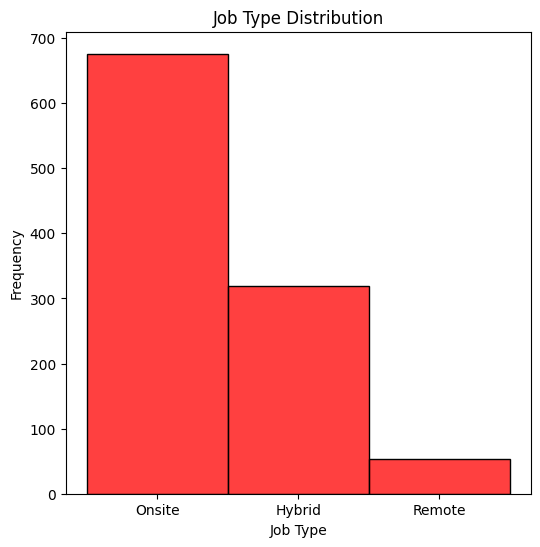

In [26]:
### Ploting histogram
plt.figure(figsize=(6,6))
sns.histplot(df3['Job_type'], color='red', bins=10)
plt.title('Job Type Distribution')
plt.xlabel('Job Type')
plt.ylabel('Frequency')
plt.show()

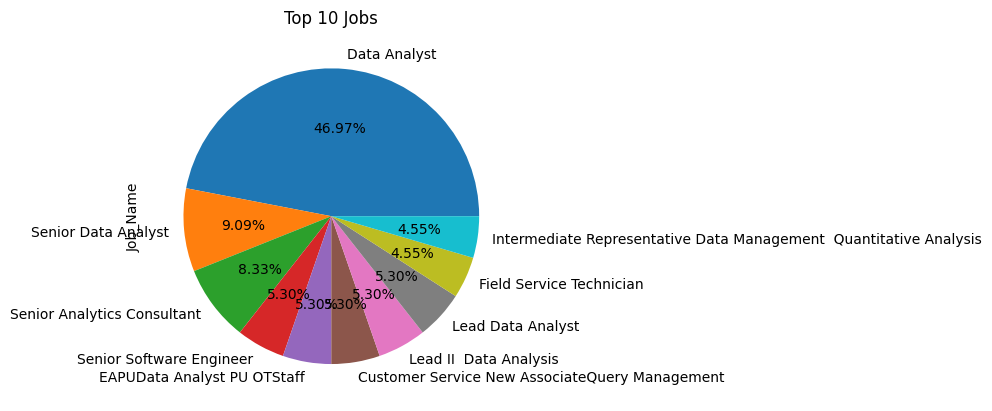

In [27]:
### Topplt.figure(figsize=(12,6))
plt.title('Top 10 Jobs')
d1=df3['Job_Name'].value_counts()
subset = d1[:10]
subset.plot(kind="pie",autopct="%1.2f%%")
plt.show()


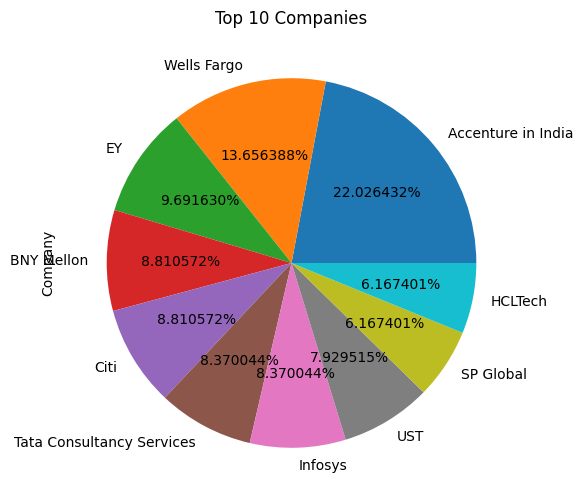

In [28]:
## Top 10 companies
plt.figure(figsize=(10,6))
plt.title('Top 10 Companies')
d3=df3['Company'].value_counts()
subset = d3[:10]
subset.plot(kind="pie",autopct="%1f%%")
plt.show()

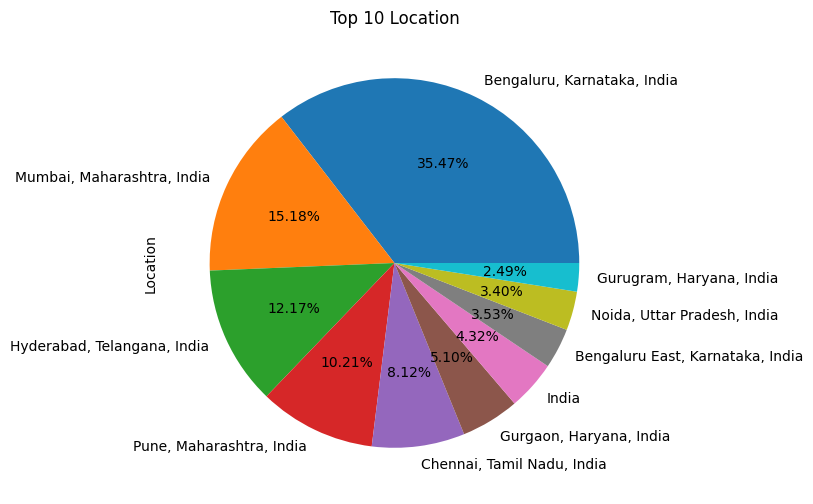

In [29]:
## Top 10 location
plt.figure(figsize=(12,6))
plt.title('Top 10 Location')
d3=df2['Location'].value_counts()
subset = d3[:10]
subset.plot(kind="pie",autopct="%1.2f%%")
plt.show()

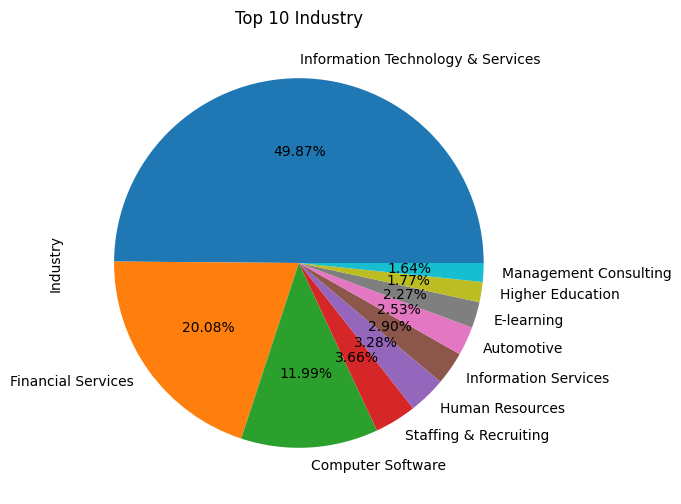

In [30]:
## Top 10 companies
plt.figure(figsize=(12,6))
plt.title('Top 10 Industry')
d7=df2['Industry'].value_counts()
subset = d7[:10]
subset.plot(kind="pie",autopct="%1.2f%%")
plt.show()

### Model Building

## Collaborative Filtering

In [31]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df3[['Job_Name', 'Company', 'Job_type',
                                          'Industry', 'Invovlement', 'Region', 'State']])
encoded_data

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
###Calculating cosine similarity between job

In [32]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

### Region based recommendations

In [33]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim_matrix = cosine_similarity(encoded_data)
## Location based recommendation
def recommend_companies(region_name, cosine_sim_matrix, df3):
    region_index = df3[df3['Region'] == region_name].index[0]
    cosine_scores = list(enumerate(cosine_sim_matrix[region_index]))
    cosine_scores = sorted(cosine_scores, key=lambda x: x[1], reverse=True)
    cosine_scores = cosine_scores[1:11] # top 10 similar companies
    region_indices = [i[0] for i in cosine_scores]
    return (df3.iloc[region_indices])
    #return list(df3['Job_Name'].iloc[region_indices],df3[]'Company'].iloc[region_indices], df3['Job_type'].iloc[region_indices])
    #df_data=df3.loc[[region_indices], ['Job_Name', 'Company', 'Job_type']]
    #return df_data

similar_companies = recommend_companies('Mumbai', cosine_sim_matrix, df3)
print(similar_companies)
#print(similar_companies.value_counts())


                                              Job_Name             Company  \
283  Reference Data Management  Index and Benchmark...  JPMorgan Chase  Co   
410  Reference Data Management  Index and Benchmark...  JPMorgan Chase  Co   
677  Asset Management  Investment Specialist Suppor...  JPMorgan Chase  Co   
131                             ICG  Analytics Markets                Citi   
149  InBusiness Credit Risk Quality Assurance Data ...                Citi   
207  InBusiness Credit Risk Quality Assurance Data ...                Citi   
361                                 DM metrics Analyst                Citi   
385  Senior Data Research Analyst  Thematic  Factor...           SP Global   
408  InBusiness Credit Risk Quality Assurance Data ...                Citi   
424  InBusiness Credit Risk Quality Assurance Data ...                Citi   

    Job_type  Employees  Followers  Applicant            Industry Invovlement  \
283   Onsite      10001    3791484       54.0  Financial Ser

In [34]:
similar_companies = recommend_companies('Bengaluru', cosine_sim_matrix, df3)
print(similar_companies)

                                               Job_Name  \
896                         MTS Silicon Design Engineer   
1120                DRAM Controller Verification Leader   
16                                  EngageOne Developer   
32                                   Solution Lead Java   
35                                           Oracle DBA   
58                            Stream LeadTechnical Lead   
72    Sr Systems Engineer 1Sr Systems Engineer 2  Se...   
80                   IT Unified Communications Engineer   
89                                Sr Engineer AI  MLOps   
94                      Technical Lead  Client Services   

                        Company Job_type  Employees  Followers  Applicant  \
896                         AMD   Onsite      10001    1068693       26.0   
1120                        AMD   Onsite      10001    1068723       34.0   
16                  LTIMindtree   Onsite      10001     390524       21.0   
32        Acara Solutions India   Onsite  

In [ ]:
## Accuracy score
#sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)

### State based recommendations

In [35]:
def recommend_companies_statewise(state_name, cosine_sim_matrix, df3):
    state_index = df3[df3['State'] == state_name].index[0]
    cosine_scores_state = list(enumerate(cosine_sim_matrix[state_index]))
    cosine_scores_state = sorted(cosine_scores_state, key=lambda x: x[1], reverse=True)
    cosine_scores_state = cosine_scores_state[1:11] # top 10 similar companies
    state_indices = [j[0] for j in cosine_scores_state]
    return (df3.iloc[state_indices])
    #return list(df3['Job_Name'].iloc[region_indices],df3[]'Company'].iloc[region_indices], df3['Job_type'].iloc[region_indices])
    #df_data=df3.loc[[region_indices], ['Job_Name', 'Company', 'Job_type']]
    #return df_data

similar_companies_state = recommend_companies_statewise('Maharashtra', cosine_sim_matrix, df3)
print(similar_companies_state)

                                              Job_Name             Company  \
283  Reference Data Management  Index and Benchmark...  JPMorgan Chase  Co   
410  Reference Data Management  Index and Benchmark...  JPMorgan Chase  Co   
677  Asset Management  Investment Specialist Suppor...  JPMorgan Chase  Co   
131                             ICG  Analytics Markets                Citi   
149  InBusiness Credit Risk Quality Assurance Data ...                Citi   
207  InBusiness Credit Risk Quality Assurance Data ...                Citi   
361                                 DM metrics Analyst                Citi   
385  Senior Data Research Analyst  Thematic  Factor...           SP Global   
408  InBusiness Credit Risk Quality Assurance Data ...                Citi   
424  InBusiness Credit Risk Quality Assurance Data ...                Citi   

    Job_type  Employees  Followers  Applicant            Industry Invovlement  \
283   Onsite      10001    3791484       54.0  Financial Ser

In [36]:
similar_companies_state = recommend_companies_statewise('Telangana', cosine_sim_matrix, df3)
print(similar_companies_state)

                                              Job_Name             Company  \
757                                    Sales Executive       LIFE AT WOODS   
13                              STEM  Robotics Trainer          Eduvacancy   
70                                Senior Data Engineer    IT OPENDOORS LLC   
238                     Data Transformation Analyst II           SP Global   
524                              Associate Web Analyst           Gainsight   
548  External Party Reference Data  Data Management...  JPMorgan Chase  Co   
605                                    Technology Lead    Broadridge India   
619                                    Technology Lead    Broadridge India   
657                                   Member Technical    Broadridge India   
659                                   Member Technical    Broadridge India   

    Job_type  Employees  Followers  Applicant                   Industry  \
757   Onsite      51200        791       46.0  Government Adminis

In [ ]:
#### Second Approach

### let's use TfidfVectorizer from scikit-learn to convert the job features into a matrix of TF-IDF features:

In [37]:
# Use the TfidfVectorizer to convert the job features into a matrix of TF-IDF features
tfidf = TfidfVectorizer(stop_words='english')
job_matrix = tfidf.fit_transform(df3['Region'])
job_similarity1= cosine_similarity(job_matrix)

In [38]:
# Compute the pairwise cosine similarity between all job pairs in the matrix
#job_similarity = cosine_similarity(job_matrix)
job_similarity=linear_kernel(job_matrix, job_matrix)

In [39]:
job_similarity.shape

(1048, 1048)

In [40]:
job_similarity[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [41]:
### Let's predict the locationwise jobs
# Choose a specific job location

def recommender_regionwise(Location,job_similarity1):
    # Get the row index of the chosen job in the job matrix
    job_location = df3[df3['Region'] == Location].index[0]

    # Get the cosine similarity scores between the chosen job and all other jobs
    similarity_scores = list(enumerate(job_similarity1[job_location]))

    # Sort the similarity scores in descending order
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Get the top 10 most similar jobs
    top_jobs= [df3.iloc[i[0]]['Job_Name'] for i in sorted_scores[1:11]]
    return top_jobs
    #print(top_jobs_pune)

# Print the top 10 recommended jobs
#print('Top 10 Recommended Jobs for {}:'.format(df3.loc['Job_Name']))
#print('Top 10 Recommended Jobs for {}:') #.format(df3.loc['Job_Name', 'Job_Name']))

#for job in top_jobs:
    #print(top_jobs)


In [42]:
recommender_regionwise('Pune',job_similarity1)

['Java LeadManager',
 'VC  Pune  4Yrs  6Yrs',
 'Sr Application Engineer I',
 'GCP Adminstrator',
 'Data Science',
 'Data AnalystAssistant ManagerPune',
 'Senior Data AnalystData Modellers',
 'Lead Analyst Data Management  Quantitative Analysis',
 'ServiceNow Performance Analytics and Reporting Analyst',
 'Marketing Data Analyst']

In [46]:
def recommender_name(JobName,job_similarity1):
    # Get the row index of the chosen job in the job matrix
    jobs = df3[df3['Job_Name'] == JobName].index[0]

    # Get the cosine similarity scores between the chosen job and all other jobs
    similarity_scores = list(enumerate(job_similarity1[jobs]))

    # Sort the similarity scores in descending order
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Get the top 10 most similar jobs
    top_jobs= [df3.iloc[i[0]]['Job_Name'] for i in sorted_scores[1:11]]
    return top_jobs

In [47]:
recommender_name('Data Science',job_similarity1)

['TCS Hiring for Network Data  RS Aruba Wireless',
 'Value Stream Leader',
 'DevSecops EngineerApplication Security Engineer',
 'Oracle DBA',
 'Big Data Developer',
 'Lead Data Scientist',
 'Tool  Die Maintenance Technician',
 'Service Technician',
 'Field Coordinators  UT Jammu  Kashmir',
 'Head of Network Operations']

In [48]:
y_pred=recommender_regionwise('Pune',job_similarity1)

2023-08-28 11:34:44.067 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py [ARGUMENTS]


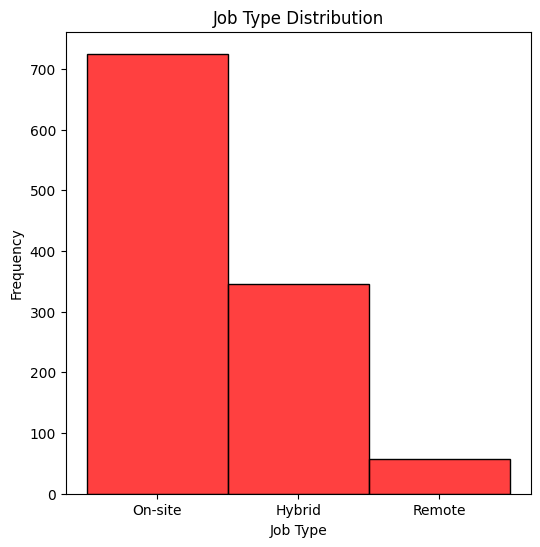

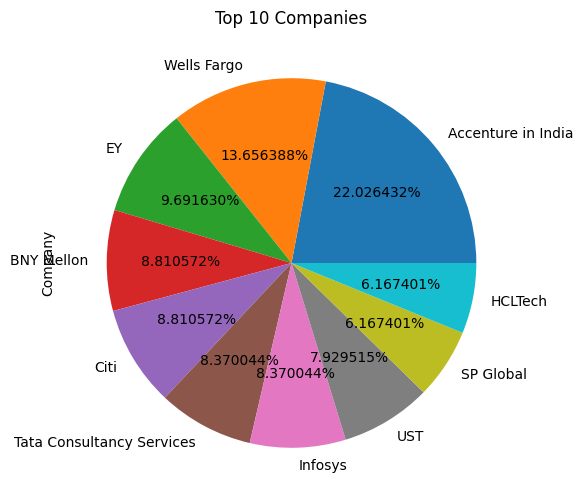

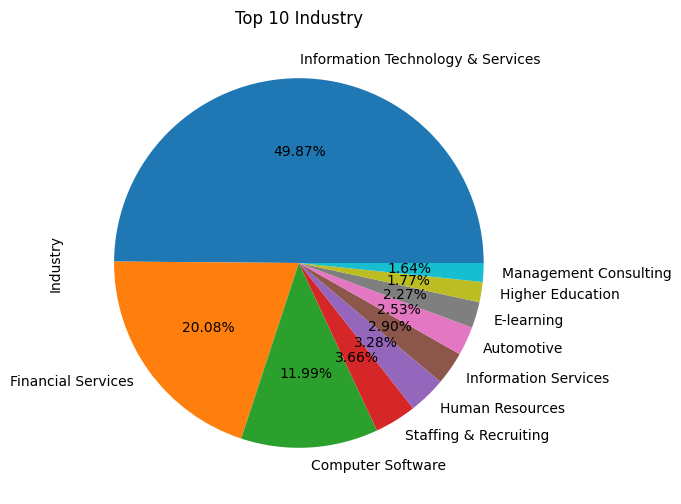

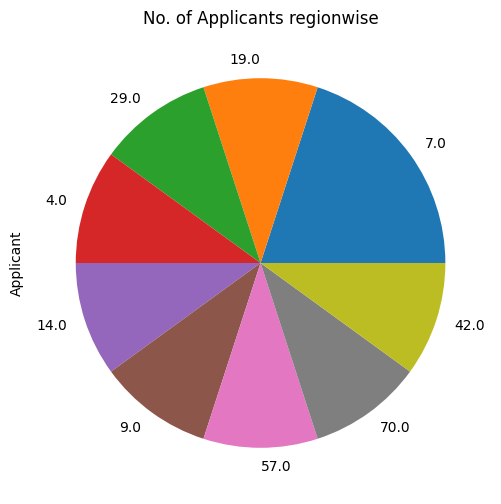

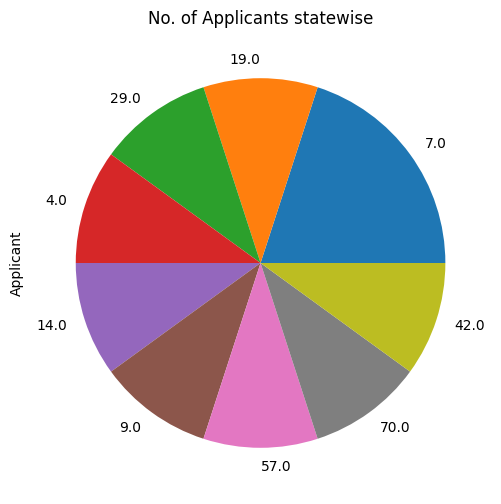

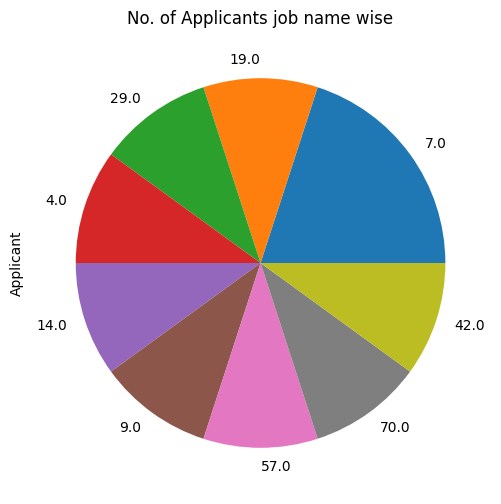

In [55]:
import pickle
import streamlit as st
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import seaborn as sns
st.title('Recommendation System ')
col1, col2, col3 = st.columns(3)
# Show plots
with col1:
    fig1, ax1 = plt.subplots(figsize=(6, 6))
    sns.histplot(df['Job_type'], color='red', bins=10, ax=ax1)
    ax1.set_title('Job Type Distribution')
    ax1.set_xlabel('Job Type')
    ax1.set_ylabel('Frequency')
    st.pyplot(fig1)

with col2:
    plt.figure(figsize=(6,6))
    plt.title('Top 10 Companies')
    d3=df3['Company'].value_counts()
    subset = d3[:10]
    subset.plot(kind="pie",autopct="%1f%%")
    st.pyplot(plt)

with col3:
    plt.figure(figsize=(6,6))
    plt.title('Top 10 Industry')
    d7=df2['Industry'].value_counts()
    subset = d7[:10]
    subset.plot(kind="pie",autopct="%1.2f%%")
    st.pyplot(plt)
def app():
    #st.set_page_config(fullscreen=True)



    # Show recommendations
#st.header('Recommendations')
    region_name = st.selectbox('Select a region', df3['Region'].unique(),index=0)
    similar_companies = recommend_companies(region_name, cosine_sim_matrix, df3)
    st.subheader(f'Top 10 similar companies to {region_name}:')
    st.write(similar_companies)

    state_name = st.selectbox('Select a state', df3['State'].unique())
    similar_companies_state = recommend_companies_statewise(state_name, cosine_sim_matrix, df3)
    st.subheader(f'Top 10 similar companies to {state_name}:')
    st.write(similar_companies_state)

    jobname1 = st.selectbox('Select a Job Name', df3['Job_Name'].unique())
    similar_companies_jobname=recommend_companies_jobname(jobname1, cosine_sim_matrix, df3)
    st.subheader(f'Top 10 similar to {jobname1}:')
    st.write(similar_companies_jobname)
    col4, col5, col6 = st.columns(3)

    with col4:
        plt.figure(figsize=(12,6))
        plt.title('No. of Applicants regionwise')

        dd4=similar_companies['Applicant'].value_counts()
        dd4.plot(kind="pie")
        st.pyplot(plt)

    with col5:
        plt.figure(figsize=(12,6))
        plt.title('No. of Applicants statewise')
        dd5=similar_companies_state['Applicant'].value_counts()
        dd5.plot(kind="pie")
        st.pyplot(plt)


    with col6:
        plt.figure(figsize=(12,6))
        plt.title('No. of Applicants job name wise')
        dd6=similar_companies_jobname['Applicant'].value_counts()
        dd6.plot(kind="pie")
        st.pyplot(plt)





# Run app
if __name__ == '__main__':
    app()
